### Evaluations of the BRFSS 2020 dataset to determine if behavioral, demographic, and medical variables are associated with self-reported cognitive decline. The "cimemlos" variable codes for this self-reported cognitive decline that has worsened over the preceeding 12 months. There are additional questions pertaining to cognitive decline that are asked if the respondent answers "Yes" to the cimemlos question. 

#### Note that not all states include the optional cognitive decline module in their surveys, and other states only include it during some years. 

In [187]:
import sys
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std
from collections import Counter
import warnings
from numpy import mean

from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import NearMiss

from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [189]:
#Read in BRFSS 2020 dataset
brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)


C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\3653559070.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  brfss_2020 = pd.read_sas(r'C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\BRFSS_2020.XPT', iterator = False, chunksize = None)
C:\Users\sdwin\AppData\Local\Temp\ipyk

In [190]:
brfss_2020.shape


(401958, 279)

In [191]:
#brfss_2020.CIMEMLOS.isna().value_counts() #CIMEMLOS is relevant question about cognitive decline

#Remove records with NaN in CIMEMLOS SCD gatekeeper question

brfss_SCD = brfss_2020.dropna(subset=['CIMEMLOS'])
brfss_SCD.drop(brfss_SCD[(brfss_SCD['CIMEMLOS'] == 7 ) | (brfss_SCD['CIMEMLOS'] == 9 )].index, inplace=True)

brfss_SCD.CIMEMLOS.value_counts()



C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\2064939713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_SCD.drop(brfss_SCD[(brfss_SCD['CIMEMLOS'] == 7 ) | (brfss_SCD['CIMEMLOS'] == 9 )].index, inplace=True)


2.0    61537
1.0     5729
Name: CIMEMLOS, dtype: int64

In [192]:
brfss_SCD.shape

(67266, 279)

In [255]:
#Remove irrelevant columns. Some of these would be correlated with age or cognitive impairment
brfss_SCD_trimmed = brfss_SCD.drop(columns = ['CNCRTYP1','_IMPRACE','HPVADVC4','CSRVPAIN','ECIGARET','EYEEXAM1','FEETCHK3','PDIABTST','HIVTST7','VCLNTEST','VIRCOLON','SDNATEST','STOOLDNA','LSTBLDS4','BLDSTOL1','SIGMTEST','SIGMSCPY','COLNTEST','COLNSCPY','PSATIME','PSATEST1','HPLSTTST','HPVTEST','LASTPAP2','HADPAP2','HOWLONG','HADMAM','PNEUVAC4','SHINGLE2','LASTSMK2','STOPSMK2','SMOKDAY2','SMOKE100','DIFFALON','DIFFDRES','EDUCA','RMVTETH4','DIABAGE3','HAVARTH4','EXERANY2','MEDCOST','PERSDOC2','_PHYS14D','GENHLTH','ASTHMA3','ASTHNOW','CVDINFR4','CVDCRHD4','LCSFIRST','LCSLAST','FEETCHK','DOCTDIAB','MAXDRNKS','AVEDRNK3','ALCDAY5','POORHLTH','MENTHLTH','PHYSHLTH','WTKG3','_AGEG5YR','_CLLCPWT','_CRACE1','_CHISPNC','TRNSGNDR','BIRTHSEX','TETANUS1','HPVADSHT','CSRVINSR','CSRVRTRN','CSRVSUM','CSRVDOC1','LCSCTSCN','RSNMRJN1','USEMRJN2','CAREGIV1','DIABEDU','HIVRISK5','HIVTSTD3','PCPSARS1','DRNKDRI2','SEATBELT','FLSHTMY3','FLUSHOT7','DECIDE','WEIGHT2','HEIGHT3','INCOME2','CHILDREN','EMPLOY1','RENTHOM1','CELLSEX','LANDSEX','HHADULT','LANDLINE','NUMMEN','NUMWOMEN','NUMADULT','_PSU','SEQNO','IDAY','IYEAR','IDATE','IMONTH','FMONTH','_STATE','DISPCODE','CTELENM1','PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHONE', 'LADULT1', 'COLGSEX', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'NUMHHOL3', 'NUMPHON3', 'CPDEMO1B', 'PREGNANT', 'PCPSAAD3','PCPSADI1', 'PCPSARE1','TOLDCFS', 'HAVECFS', 'WORKCFS','TOLDHEPC','TRETHEPC', 'PRIRHEPC', 'HAVEHEPC', 'HAVEHEPB', 'MEDSHEPB','HLTHCVR1', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'CSRVSUM', 'CSRVRTRN', 'CSRVINST', 'CSRVDEIN', 'CSRVCLIN', 'CSRVCTL2', 'PCPSADE1', 'PCDMDEC1', 'IMFVPLA1', 'RCSGENDR', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_CPRACE', '_DUALUSE', '_DUALCOR', '_LLCPWT2', '_LLCPWT', '_HCVU651', '_LTASTH1', '_CASTHM1', '_EXTETH3', '_ALTETH3', '_DENVST3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', '_BMI5', '_RFBMI5', '_CHLDCNT', '_RFSMOK3', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWK1', '_FLSHOT7', '_PNEUMO3', '_RFSEAT2', '_RFSEAT3', '_DRNKDRV', '_RFMAM22', '_MAM5023', '_RFPAP35', '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA', '_VIRCOLN', '_SBONTIM', '_CRCREC1', '_AIDTST4'])

brfss_convert = brfss_SCD_trimmed.convert_dtypes(convert_integer = True)
brfss_convert.columns = brfss_convert.columns.str.lower()
brfss_convert.fillna(0, inplace=True)
corr_df = brfss_convert.copy()

corr_df.columns

Index(['sexvar', 'hlthpln1', 'checkup1', 'sleptim1', 'cvdstrk3', 'chcscncr',
       'chcocncr', 'chccopd2', 'addepev3', 'chckdny2', 'diabete4', 'lastden4',
       'marital', 'veteran3', 'deaf', 'blind', 'diffwalk', 'usenow3',
       'drnk3ge5', 'fall12mn', 'fallinj4', 'hadhyst2', 'prediab1', 'insulin1',
       'bldsugar', 'chkhemo3', 'diabeye', 'cimemlos', 'ecignow', 'marijan1',
       'lcsnumcg', 'cncrdiff', 'cncrage', 'csrvtrt3', 'somale', 'sofemale',
       'acedeprs', 'acedrink', 'acedrugs', 'aceprisn', 'acedivrc', 'acepunch',
       'acehurt1', 'aceswear', 'acetouch', 'acetthem', 'acehvsex', '_metstat',
       '_urbstat', 'mscode', '_rfhlth', '_ment14d', '_totinda', '_michd',
       '_asthms1', '_drdxar2', '_race', '_bmi5cat', '_educag', '_incomg',
       '_smoker3', '_rfdrhv7'],
      dtype='object')

In [194]:
brfss_convert.cimemlos.value_counts()

2    61537
1     5729
Name: cimemlos, dtype: Int64

In [239]:
#Separate out cimemlos target feature & remap from 2/1 to 0/1
remap = {2:0}
brfss_convert["cimemlos"].replace(remap, inplace=True)

brfss_convert_keep_y = brfss_convert.copy()

y = np.ravel(brfss_convert[['cimemlos']]).copy()
brfss_convert.drop(columns = 'cimemlos', inplace=True)



In [240]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [197]:
brfss_convert.shape

(67266, 61)

In [198]:
#Produce bins for sleptim1
'''
77 or 99 value = 6
1-4 hours = 1
5-6 hours = 2
7-10 hours = 3
11-24 hours = 4
'''

bins = [0, 0.9, 4, 6, 10, 24, 76, 100]
labels = [0, 1, 2, 3, 4, 5, 6]
brfss_convert.sleptim1 = pd.cut(brfss_convert.sleptim1, bins=bins, labels=labels)
#brfss_convert.sleptim1.fillna(90, inplace=True)

brfss_convert.sleptim1.value_counts(dropna=False)

#brfss_convert.sleptim1_filled.hist()
#plt.show()


3    46651
2    16807
1     2350
4      761
6      697
0        0
5        0
Name: sleptim1, dtype: int64

In [199]:
##### Produce bins for drnk3ge5  
'''


During the past 30 days, how many times did you 
Men have 5 or more drinks
Women have 4 or more drinks

'Not asked' & 'Refused' recoded from 0 or 99 to 90, then
'None' recoded from 88 to 0

90    35712
0     25592
1      4010
2       702
4       537
3       358
77      355

'''

brfss_convert.drnk3ge5.replace([0,77, 99],90, inplace=True)
brfss_convert.drnk3ge5.replace(88,0, inplace=True)


bins = [0.9, 4, 8, 15, 76, 100]
labels = [1,2,3,4,90]
brfss_convert.drnk3ge5 = pd.cut(brfss_convert.drnk3ge5, bins=bins, labels=labels)
brfss_convert.drnk3ge5 = brfss_convert.drnk3ge5.values.add_categories(0)
brfss_convert.drnk3ge5.fillna(0, inplace=True)


brfss_convert.drnk3ge5.value_counts(dropna=False)



90    36067
0     25592
1      4010
2       702
4       537
3       358
Name: drnk3ge5, dtype: int64

In [200]:
#fall12mn Question: In the past 12 months, how many times have you fallen?

##### Produce bins
'''
'Don't Know', 'Not asked' & 'Refused' recoded from 0/77/99 to 90, then
'None' recoded from 88 to 0

0     48396
1     15824
2      1328
90      738
3       618
4       362
'''

brfss_convert.fall12mn.replace([0,77,99],90, inplace=True)

brfss_convert.fall12mn.replace(88,0, inplace=True)


bins = [0.9, 4, 8, 15, 76, 100]
labels = [1,2,3,4,90]
brfss_convert.fall12mn = pd.cut(brfss_convert.fall12mn, bins=bins, labels=labels)
brfss_convert.fall12mn = brfss_convert.fall12mn.values.add_categories(0)
brfss_convert.fall12mn.fillna(0, inplace=True)


brfss_convert.fall12mn.value_counts(dropna=False)



0     48396
1     15824
2      1328
90      738
3       618
4       362
Name: fall12mn, dtype: int64

In [201]:
#fallinj4 Question: How many of these falls (from fall12mn) caused an injury that limited your regular activities for at least a day?

##### Produce bins
'''
'Don't Know', 'Not asked' & 'Refused' recoded from 0/77/99 to 90, then
'None' recoded from 88 to 0

90    49264
0     11494
1      6141
2       232
3       135
'''

brfss_convert.fallinj4.replace([0,77,99],90, inplace=True)

brfss_convert.fallinj4.replace(88,0, inplace=True)


bins = [0.9, 4, 8, 76, 100]
labels = [1,2,3,90]
brfss_convert.fallinj4 = pd.cut(brfss_convert.fallinj4, bins=bins, labels=labels)
brfss_convert.fallinj4 = brfss_convert.fallinj4.values.add_categories(0)
brfss_convert.fallinj4.fillna(0, inplace=True)


brfss_convert.fallinj4.value_counts(dropna=False)

90    49264
0     11494
1      6141
2       232
3       135
Name: fallinj4, dtype: int64

In [202]:
#bldsugar Question: About how often do you check your blood for glucose or sugar? [Include times when checked by a family member or friend, but do NOT include times when checked by a health professional.]
##### Produce bins
'''
'Don't Know', 'Not asked' & 'Refused' recoded from 0/777/999 to 900, then
'None' recoded from 888 to 0

Never = 0
At least daily = 1
At least weekly = 2
At least monthly = 3
At least yearly = 4

900    64792
1       1460
2        385
0        358
4        140
3        131
'''

brfss_convert.bldsugar.replace([0,777,999],900, inplace=True)

brfss_convert.bldsugar.replace(888,0, inplace=True)


bins = [0.9, 199, 299, 399, 499, 999]
labels = [1,2,3,4,900]
brfss_convert.bldsugar = pd.cut(brfss_convert.bldsugar, bins=bins, labels=labels)
brfss_convert.bldsugar = brfss_convert.bldsugar.values.add_categories(0)
brfss_convert.bldsugar.fillna(0, inplace=True)


brfss_convert.bldsugar.value_counts(dropna=False)

900    64792
1       1460
2        385
0        358
4        140
3        131
Name: bldsugar, dtype: int64

In [203]:
##### Produce bins for marijan1  Question: During the past 30 days, on how many days did you use marijuana or cannabis?
'''

'Not asked' / "Don't Know" / 'Refused' recoded from 0 / 77/ 99 to 90, then
'None' recoded from 88 to 0
1-2 days = 1
3-7 days = 2
8-15 days = 3
16-30 days = 4

90    34697
0     29999
4      1243
1       527
2       483
3       317
'''

brfss_convert.marijan1.replace([0,77,99],90, inplace=True)

brfss_convert.marijan1.replace(88,0, inplace=True)


bins = [0.9, 2, 7, 15, 76, 100]
labels = [1,2,3,4,90]
brfss_convert.marijan1 = pd.cut(brfss_convert.marijan1, bins=bins, labels=labels)
brfss_convert.marijan1 = brfss_convert.marijan1.values.add_categories(0)
brfss_convert.marijan1.fillna(0, inplace=True)


brfss_convert.marijan1.value_counts(dropna=False)


90    34697
0     29999
4      1243
1       527
2       483
3       317
Name: marijan1, dtype: int64

In [204]:
#lcsnumcg Question: On average, when you smoke/smoked regularly, about how many cigarettes do/did you usually smoke each day??
##### Produce bins
'''
'Don't Know', 'No Feet', Not asked' & 'Refused' recoded from 0/777/999 to 900

1-19 cigarettes = 1
20-39 cigarettes = 2
40-59 cigarettes = 3
60+ cigarettes = 4

900    62759
1       2134
2       1864
3        387
4        122
'''

brfss_convert.lcsnumcg.replace([0,777,999],900, inplace=True)

bins = [0.9, 19, 39, 59, 776, 999]
labels = [1,2,3,4,900]
brfss_convert.lcsnumcg = pd.cut(brfss_convert.lcsnumcg, bins=bins, labels=labels)


brfss_convert.lcsnumcg.value_counts(dropna=False)


900    62759
1       2134
2       1864
3        387
4        122
Name: lcsnumcg, dtype: int64

In [205]:
#chkhemo3 Question: About how many times in the past 12 months has a doctor, nurse, or other health professional checked you for A-one-C?

##### Produce bins
'''
'Don't Know', 'Not asked', 'Never Heard of it', & 'Refused' recoded from 0/77/98/99 to 90, then
"None" from 88 to 0

90    64824
1      2156
0       186
2        91
3         9

'''

brfss_convert.chkhemo3.replace([0,77,98,99],90, inplace=True)
brfss_convert.chkhemo3.replace(88, 0, inplace=True)

bins = [0.9, 4, 12, 76, 100]
labels = [1,2,3,90]
brfss_convert.chkhemo3 = pd.cut(brfss_convert.chkhemo3, bins=bins, labels=labels)
brfss_convert.chkhemo3 = brfss_convert.chkhemo3.values.add_categories(0)
brfss_convert.chkhemo3.fillna(0, inplace=True)


brfss_convert.chkhemo3.value_counts(dropna=False)


90    64824
1      2156
0       186
2        91
3         9
Name: chkhemo3, dtype: int64

In [206]:
#Produce bins for cncrage
'''
All respondents to this question had cancer

'Don't Know', 'Not asked', & 'Refused' recoded from 0/98/99 to 0, then

Age when diagnosed w/ cancer:

1 = 1-25
2 = 26-50
3 = 51-100

0    62860
3     2939
2     1331
1      136
'''

brfss_convert.cncrage.replace([0,98,99],0, inplace=True)

bins = [0,.9, 25, 50, 100]
labels = [0,1,2,3]

brfss_convert.cncrage = pd.cut(brfss_convert.cncrage, bins=bins, labels=labels)
brfss_convert.cncrage.fillna(0, inplace=True)

brfss_convert.cncrage.value_counts(dropna=False)

0    62860
3     2939
2     1331
1      136
Name: cncrage, dtype: int64

In [207]:
#Reduce number of features to prevent overfitting
X = brfss_convert.astype('int')
#X.head()
brfss_convert.head()

,sexvar,hlthpln1,checkup1,sleptim1,cvdstrk3,chcscncr,chcocncr,chccopd2,addepev3,chckdny2,diabete4,lastden4,marital,veteran3,deaf,blind,diffwalk,usenow3,drnk3ge5,fall12mn,fallinj4,hadhyst2,prediab1,insulin1,bldsugar,chkhemo3,diabeye,ecignow,marijan1,lcsnumcg,cncrdiff,cncrage,csrvtrt3,somale,sofemale,acedeprs,acedrink,acedrugs,aceprisn,acedivrc,acepunch,acehurt1,aceswear,acetouch,acetthem,acehvsex,_metstat,_urbstat,mscode,_rfhlth,_ment14d,_totinda,_michd,_asthms1,_drdxar2,_race,_bmi5cat,_educag,_incomg,_smoker3,_rfdrhv7
5341,2,2,1,3,2,2,2,2,1,2,1,1,1,2,2,2,2,3,0,0,90,2,0,0,900,90,0,0,0,900,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,1,1,3,1,8,4,2,3,3,1
5342,2,1,1,3,2,2,1,2,2,2,3,4,1,2,2,2,1,3,90,1,1,2,3,0,900,90,0,0,0,900,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,3,1,3,3,1,5,1,1
5344,1,1,1,3,2,1,2,2,2,2,3,1,2,2,2,2,2,1,0,1,1,0,3,0,900,90,0,0,0,900,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,3,2,1,2,4,5,4,1
5345,2,1,1,3,2,2,2,1,2,2,1,4,4,2,2,2,2,3,90,0,90,2,0,0,900,90,0,2,3,900,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,1,1,3,2,1,3,4,9,3,1
5346,2,1,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1,3,90,2,0,1,0,0,900,90,0,0,0,900,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,3,1,1,3,2,9,4,1


In [208]:
X.dtypes

sexvar      int32
hlthpln1    int32
checkup1    int32
sleptim1    int32
cvdstrk3    int32
chcscncr    int32
chcocncr    int32
chccopd2    int32
addepev3    int32
chckdny2    int32
diabete4    int32
lastden4    int32
marital     int32
veteran3    int32
deaf        int32
blind       int32
diffwalk    int32
usenow3     int32
drnk3ge5    int32
fall12mn    int32
fallinj4    int32
hadhyst2    int32
prediab1    int32
insulin1    int32
bldsugar    int32
chkhemo3    int32
diabeye     int32
ecignow     int32
marijan1    int32
lcsnumcg    int32
cncrdiff    int32
cncrage     int32
csrvtrt3    int32
somale      int32
sofemale    int32
acedeprs    int32
acedrink    int32
acedrugs    int32
aceprisn    int32
acedivrc    int32
acepunch    int32
acehurt1    int32
aceswear    int32
acetouch    int32
acetthem    int32
acehvsex    int32
_metstat    int32
_urbstat    int32
mscode      int32
_rfhlth     int32
_ment14d    int32
_totinda    int32
_michd      int32
_asthms1    int32
_drdxar2    int32
_race     

In [209]:
y=y.astype('int')

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
counter = Counter(y_under)
print(counter)

Counter({0: 5729, 1: 5729})


In [210]:
#One Hot Encode the data

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.4, random_state=42)


ohe = OneHotEncoder(handle_unknown='ignore')
encoder = ohe.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
columns = ohe.get_feature_names(X.columns)



C:\Users\sdwin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [211]:
X_train
#X_test.shape

<6874x300 sparse matrix of type '<class 'numpy.float64'>'
	with 419314 stored elements in Compressed Sparse Row format>

In [212]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)




In [213]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#y_pred_for_train = rf.predict(X_train) #was used to produce score on training set to test for overfitting

print(confusion_matrix(y_test, y_pred))


[[1598  730]
 [ 728 1528]]


In [214]:
'''The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics. See also precision_recall_fscore_support for more details on averages.

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
'''
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      2328
           1       0.68      0.68      0.68      2256

    accuracy                           0.68      4584
   macro avg       0.68      0.68      0.68      4584
weighted avg       0.68      0.68      0.68      4584



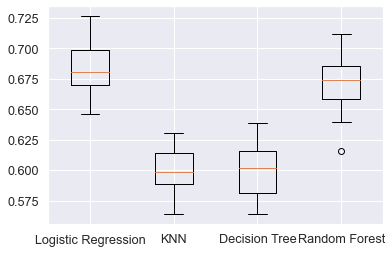

In [215]:

# different models

models = {'Logistic Regression': LogisticRegression(max_iter=1000), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier(), "Random Forest": rf}
results = []
for model in models.values():
    kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels = models.keys())
plt.show()


In [216]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# summarize selected features
cols = test.get_support(indices=True)
features_df_new = X.iloc[:,cols]
print(features_df_new.columns)


[ 3.439e+00  1.989e+00  1.197e+00  1.438e+02  7.813e+01  1.055e+01
  4.125e+01  2.094e+02  1.134e+03  9.951e+00  2.172e+02  2.610e+02
  6.270e+01  6.673e+01  4.290e+02  3.201e+02  1.576e+03 -6.003e-01
  1.203e+02  1.935e+02  1.847e+03  2.479e+01  1.503e+02  2.841e+01
  2.526e+01  2.696e+01  3.341e+01  2.283e+02  7.763e+00  1.309e+01
  1.797e+01  7.116e+00  1.582e+01  4.518e-01  7.888e-01  2.110e-01
  1.021e+00  2.377e+00  2.218e+00  8.795e+00  4.583e+01  7.987e+01
  7.690e+01  5.960e+01  5.335e+01  5.827e+01  4.015e+01  3.563e+01
  1.224e+01  1.581e+03  1.532e+03  4.457e+02  7.039e+02  9.288e+01
  1.081e+03  5.818e+00  5.117e+01  2.651e+02  3.636e+02  3.799e+02
  6.065e-02]
Index(['addepev3', 'deaf', 'diffwalk', 'fallinj4', '_rfhlth', '_ment14d',
       '_totinda', '_michd', '_drdxar2', '_smoker3'],
      dtype='object')


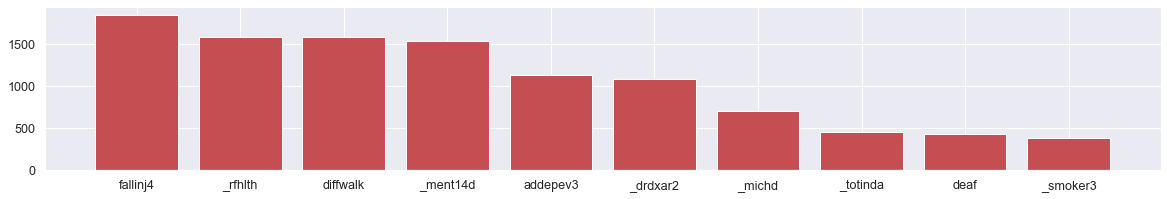

In [217]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(10):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(20, 3)) 
plt.bar(features, fit.scores_[indices[range(10)]], color='r', align='center', width=0.8)
plt.show()


In [238]:
corr_df.fallinj4.value_counts()

0     49135
88    11494
1      4620
2      1020
3       356
4       145
5       122
77      117
6        58
10       36
8        29
7        23
15       20
12       18
20       13
99       12
76       10
30        7
9         6
25        5
50        4
40        3
13        3
11        3
27        2
24        2
14        1
18        1
16        1
Name: fallinj4, dtype: Int64

(0.0, 10.0)

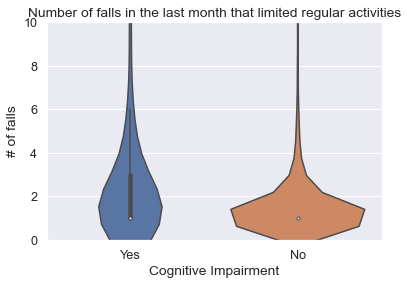

In [346]:
## Violin plot of cimemlos with fallinj4

corr_df.fallinj4.replace([0,77,99], 90, inplace=True)

corr_df.fallinj4.replace(88,0, inplace=True)
corr_df = corr_df[corr_df.fallinj4 != 90]
corr_df = corr_df.astype('float')

fig, ax = plt.subplots(1)
sns.violinplot(x="cimemlos", y="fallinj4", data=corr_df, ax=ax).set(ylabel='# of falls', xlabel='Cognitive Impairment', title='Number of falls in the last month that limited regular activities')
plt.xticks([0,1], ['Yes', 'No'])
ax.set_ylim(0,10)

(0.0, 100.0)

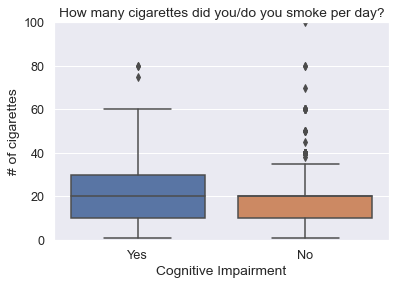

In [348]:
## Violin plot of cimemlos with LCSNUMCG (# of cigarettes per day on avg)
#MENTHLTH was intially removed as a data feature due to correlation w/ _smoker3
#Used original df to include this continuous variable

brfss_SCD.LCSNUMCG.replace([0,77,99], 90, inplace=True)

brfss_SCD.LCSNUMCG.replace(88,0, inplace=True)
brfss_SCD = brfss_SCD[brfss_SCD.LCSNUMCG != 90]
brfss_SCD = brfss_SCD.astype('float')

fig, ax = plt.subplots(1)
sns.boxplot(x='CIMEMLOS', y='LCSNUMCG', data=brfss_SCD, ax=ax).set(ylabel='# of cigarettes', xlabel='Cognitive Impairment', title='How many cigarettes did you/do you smoke per day?')
plt.xticks([0,1], ['Yes', 'No'])
ax.set_ylim(0,100)

(-5.0, 40.0)

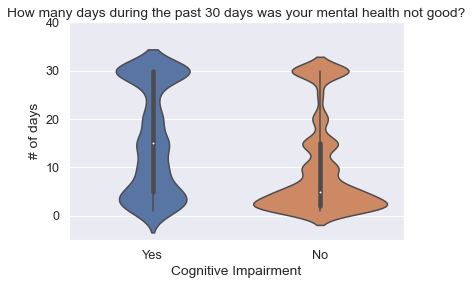

In [349]:
## Violin plot of cimemlos with MENTHLTH
#MENTHLTH was intially removed as a data feature due to correlation w/ _ment14d
#Used original df to include this continuous variable

brfss_SCD.MENTHLTH.replace([0,77,99], 90, inplace=True)

brfss_SCD.MENTHLTH.replace(88,0, inplace=True)
brfss_SCD = brfss_SCD[brfss_SCD.MENTHLTH != 90]
brfss_SCD = brfss_SCD.astype('float')

fig, ax = plt.subplots(1)
sns.violinplot(x='CIMEMLOS', y='MENTHLTH', data=brfss_SCD, ax=ax).set(ylabel='# of days', xlabel='Cognitive Impairment', title='How many days during the past 30 days was your mental health not good?')
plt.xticks([0,1], ['Yes', 'No'])
ax.set_ylim(-5,40)

In [ ]:
## Violin plot of cimemlos with fallinj4

corr_df.menthlth.replace([0,77,99], 90, inplace=True)

corr_df.fallinj4.replace(88,0, inplace=True)
corr_df = corr_df[corr_df.fallinj4 != 90]
corr_df = corr_df.astype('float')

fig, ax = plt.subplots(1)
sns.violinplot(x='cimemlos', y='fallinj4', data=corr_df, ax=ax)
ax.set_ylim(0,10)

In [234]:


corr = corr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\sdwin\AppData\Local\Temp\ipykernel_24672\1498679271.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,sexvar,hlthpln1,checkup1,sleptim1,cvdstrk3,chcscncr,chcocncr,chccopd2,addepev3,chckdny2,diabete4,lastden4,marital,veteran3,deaf,blind,diffwalk,usenow3,drnk3ge5,fall12mn,fallinj4,hadhyst2,prediab1,insulin1,bldsugar,chkhemo3,diabeye,cimemlos,ecignow,marijan1,lcsnumcg,cncrdiff,cncrage,csrvtrt3,somale,sofemale,acedeprs,acedrink,acedrugs,aceprisn,acedivrc,acepunch,acehurt1,aceswear,acetouch,acetthem,acehvsex,_metstat,_urbstat,mscode,_rfhlth,_ment14d,_totinda,_michd,_asthms1,_drdxar2,_race,_bmi5cat,_educag,_incomg,_smoker3,_rfdrhv7
sexvar,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
hlthpln1,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
checkup1,-0.06,0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sleptim1,0.01,0.04,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cvdstrk3,0.00,0.01,0.02,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chcscncr,0.02,0.02,0.05,0.01,0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chcocncr,-0.03,0.03,0.05,-0.01,0.12,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chccopd2,-0.02,0.02,0.04,0.01,0.13,0.09,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
addepev3,-0.08,0.01,0.03,0.02,0.10,0.07,0.08,0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chckdny2,0.00,0.01,0.03,0.01,0.15,0.11,0.12,0.13,0.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
brfss_SCD.fillna(value=0, inplace=True)
brfss_SCD = brfss_SCD.astype('int32')
ci_vs_depr = ols('CIMEMLOS ~ ADDEPEV3', data = brfss_SCD).fit()
print (ci_vs_depr.params)

In [ ]:
'''
Top 5 predictive features
Question: (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?
Question: Do you have serious difficulty walking or climbing stairs?
Question: Adults with good or better health
Question: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
Question: Respondents who have had a doctor diagnose them as having some form of arthritis

Next 5 predictive features
Question: Are you deaf or do you have serious difficulty hearing?
Question: Did you live with anyone who was a problem drinker or alcoholic?
Question: Did you live with anyone who served time or was sentenced to serve time in a prison, jail, or other correctional facility?
Question: Race/ethnicity categories
Question: Did you live with anyone who was depressed, mentally ill, or suicidal?


'''

In [ ]:
#Re-evaluate Logistic Regression model with just top 10 features